# Data Import and Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier


In [4]:
file_path = '/content/patient_readmission_data (1).csv'
data = pd.read_csv(file_path)
data.head()

,patient_id,age,admission_type,diagnosis,num_lab_procedures,num_medications,num_outpatient_visits,num_inpatient_visits,num_emergency_visits,num_diagnoses,num_readmissions,a1c_result,pollution_index,temperature,predicted_readmission,readmitted
0,1,72,Elective,Heart Failure,19,29,9,17,50,1,0,7.988066,103.820725,25.949289,0.383887,0
1,2,62,Emergency,Pneumonia,64,6,24,3,2,3,5,9.047137,87.472694,25.295056,0.162004,0
2,3,74,Elective,Pneumonia,91,49,7,7,60,2,1,9.000763,101.105213,20.100548,0.744007,1
3,4,87,Emergency,Pneumonia,117,40,10,14,11,8,3,9.660645,112.221747,29.991610,0.562963,1
4,5,61,Elective,Heart Failure,98,65,4,2,28,7,1,8.851144,109.169529,25.759937,0.619632,1


In [5]:
print("Dataset Shape:", data.shape)

Dataset Shape: (1000, 16)


# Data Inspection

In [6]:
print("\nColumn Info:")
data.info()


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   admission_type         1000 non-null   object 
 3   diagnosis              1000 non-null   object 
 4   num_lab_procedures     1000 non-null   int64  
 5   num_medications        1000 non-null   int64  
 6   num_outpatient_visits  1000 non-null   int64  
 7   num_inpatient_visits   1000 non-null   int64  
 8   num_emergency_visits   1000 non-null   int64  
 9   num_diagnoses          1000 non-null   int64  
 10  num_readmissions       1000 non-null   int64  
 11  a1c_result             1000 non-null   float64
 12  pollution_index        1000 non-null   float64
 13  temperature            1000 non-null   float64
 14  predicted_readmission  1000 non-null   floa

In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
patient_id               0
age                      0
admission_type           0
diagnosis                0
num_lab_procedures       0
num_medications          0
num_outpatient_visits    0
num_inpatient_visits     0
num_emergency_visits     0
num_diagnoses            0
num_readmissions         0
a1c_result               0
pollution_index          0
temperature              0
predicted_readmission    0
readmitted               0
dtype: int64


# Data Visualization

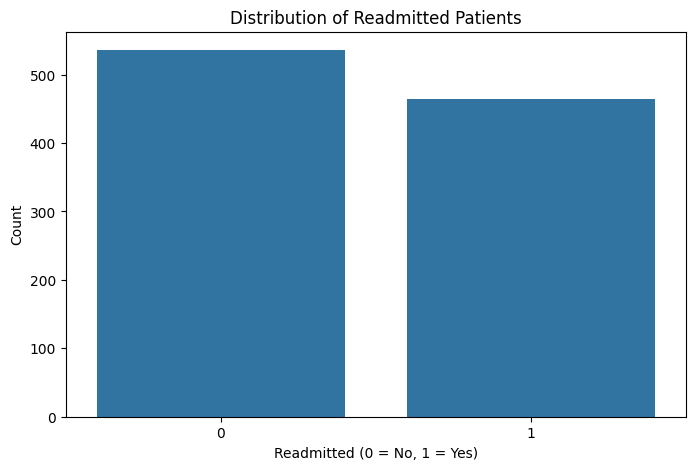

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='readmitted', data=data)
plt.title('Distribution of Readmitted Patients')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

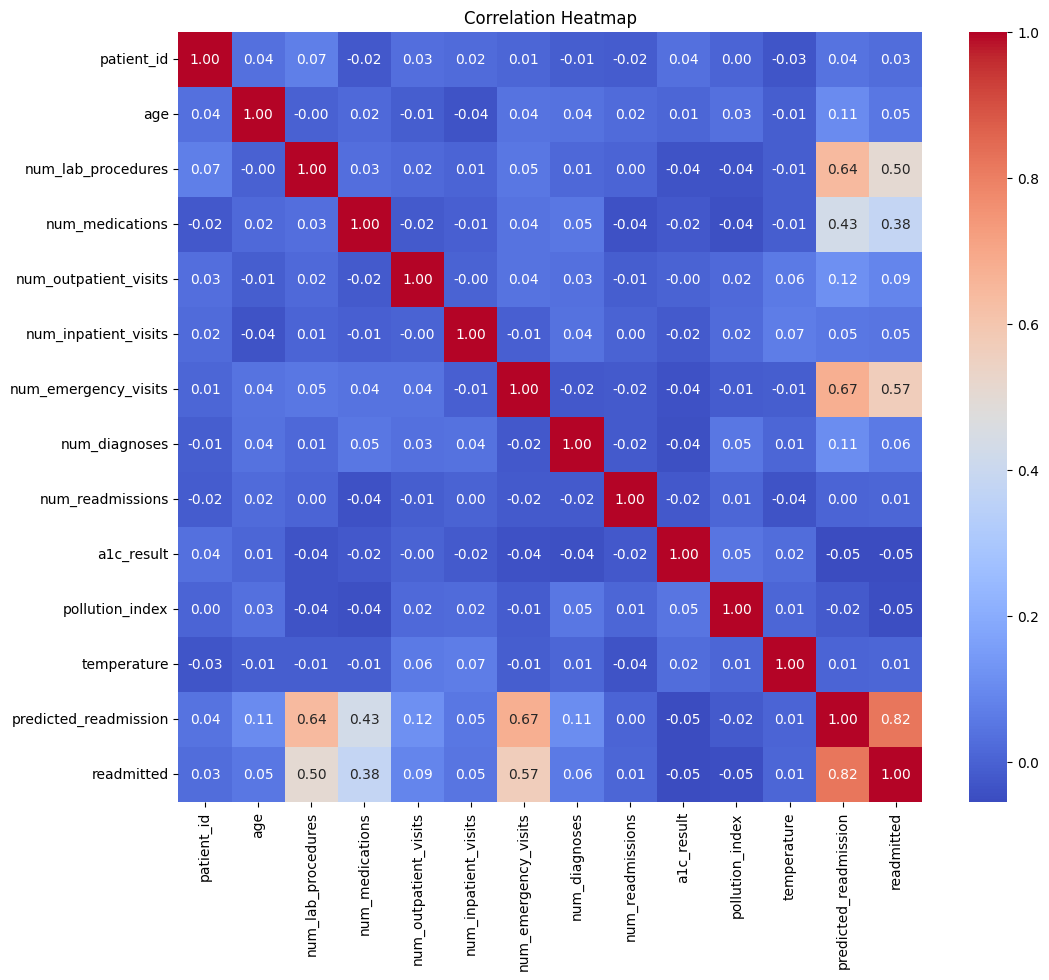

In [9]:
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

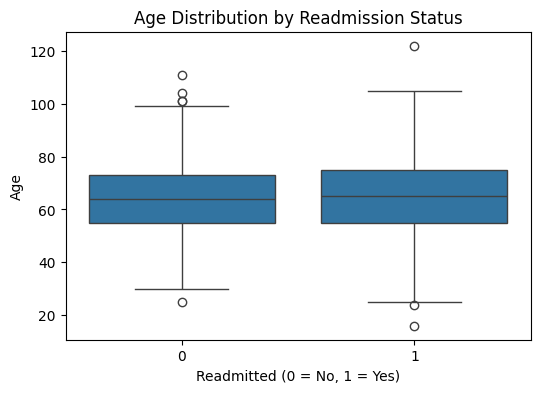

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='readmitted', y='age', data=data)
plt.title('Age Distribution by Readmission Status')
plt.xlabel('Readmitted (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Data Cleaning and Preprocessing

In [11]:
# Drop unnecessary columns
data = data.drop(columns=['patient_id'])

In [12]:
# One-hot encode categorical columns
categorical_columns = ['admission_type', 'diagnosis']
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded columns back to the original data
data = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

In [13]:
# Normalize numerical columns
numerical_columns = ['age', 'num_lab_procedures', 'num_medications', 'num_outpatient_visits',
                     'num_inpatient_visits', 'num_emergency_visits', 'num_diagnoses', 'a1c_result',
                     'pollution_index', 'temperature', 'num_readmissions']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Model Building and Training

In [14]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['readmitted'])
y = data['readmitted']

# Split into training and testing sets(test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Output the processed data shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (800, 19)
Testing features shape: (200, 19)
Training labels shape: (800,)
Testing labels shape: (200,)


## **1- Logistic Regression**




In [16]:
# Apply Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

In [17]:
print("Logistic Regression Accuracy:", logistic_accuracy)


Logistic Regression Accuracy: 0.975


In [18]:

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       104
           1       0.98      0.97      0.97        96

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [19]:
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Confusion Matrix:
 [[102   2]
 [  3  93]]


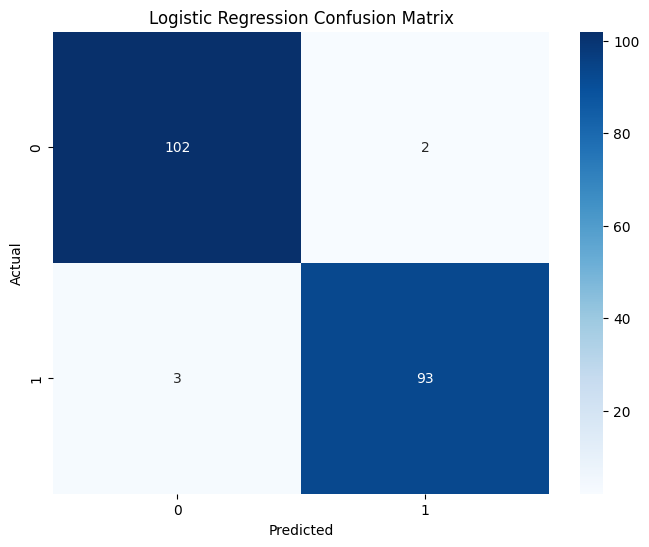

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **2- Decision Tree Classifier**

In [21]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [22]:
print("\nDecision Tree Accuracy:", tree_accuracy)


Decision Tree Accuracy: 1.0


In [23]:
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        96

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [24]:
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Confusion Matrix:
 [[104   0]
 [  0  96]]


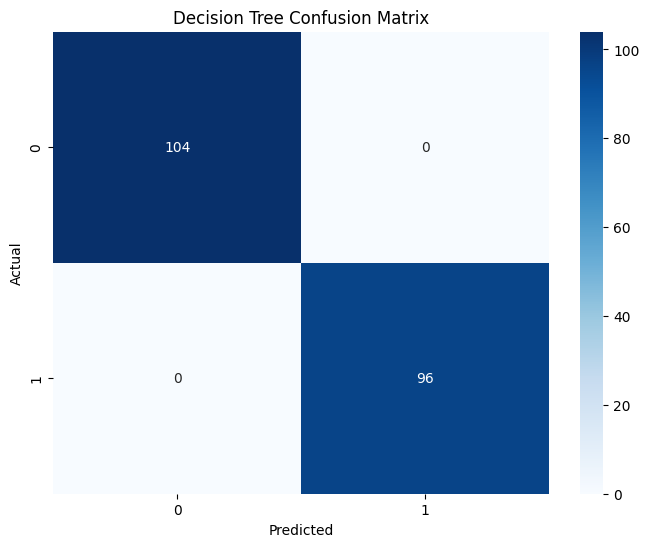

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **3- Random Forest Classifier**

In [26]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)

In [27]:
print("\nRandom Forest Accuracy:", forest_accuracy)


Random Forest Accuracy: 0.995


In [28]:
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.99      1.00      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [29]:
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))


Random Forest Confusion Matrix:
 [[103   1]
 [  0  96]]


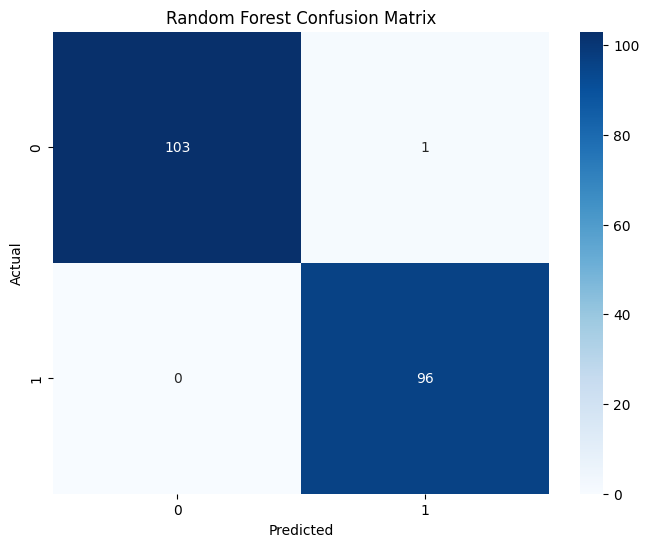

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **4- KNN Classifier**

In [31]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Accuracy:", knn_accuracy)


K-Nearest Neighbors Accuracy: 0.88


In [32]:
print("\nK-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       104
           1       0.87      0.89      0.88        96

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



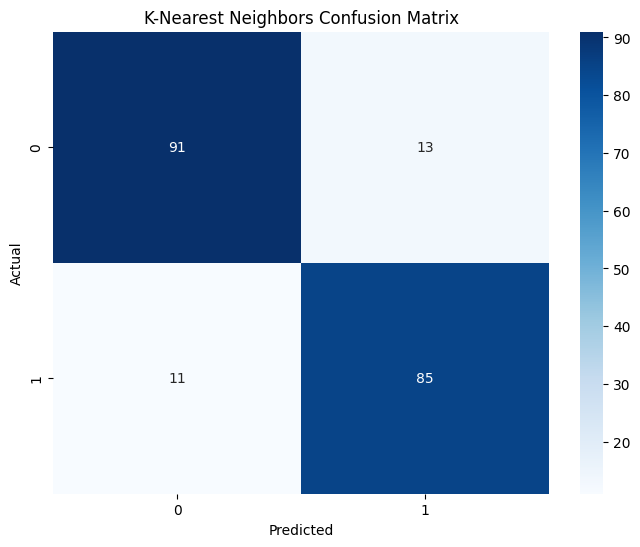

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **5- SVM Classifier**

In [34]:
# Support Vector Machine Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSupport Vector Machine Accuracy:", svm_accuracy)



Support Vector Machine Accuracy: 0.935


In [35]:
print("\nSupport Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       104
           1       0.97      0.90      0.93        96

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



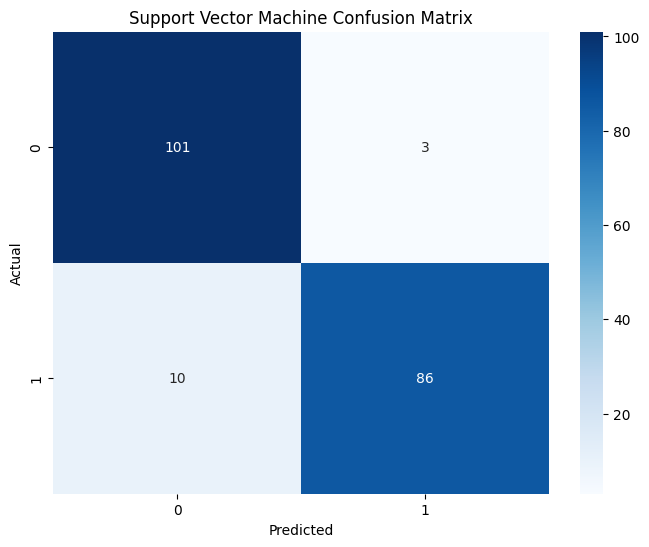

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Comparing Models

In [37]:
# Compare Results
results = {
    'Model': ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [knn_accuracy, svm_accuracy, tree_accuracy, forest_accuracy, logistic_accuracy]
}
results_df = pd.DataFrame(results)

print("\nComparison of Model Accuracies:\n", results_df)



Comparison of Model Accuracies:
                  Model  Accuracy
0                  KNN     0.880
1                  SVM     0.935
2        Decision Tree     1.000
3        Random Forest     0.995
4  Logistic Regression     0.975


In [38]:
# Highlight the best model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

print("\nBest Model:\n", best_model)


Best Model:
 Model       Decision Tree
Accuracy              1.0
Name: 2, dtype: object


<ipython-input-39-ef2870ffe818>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


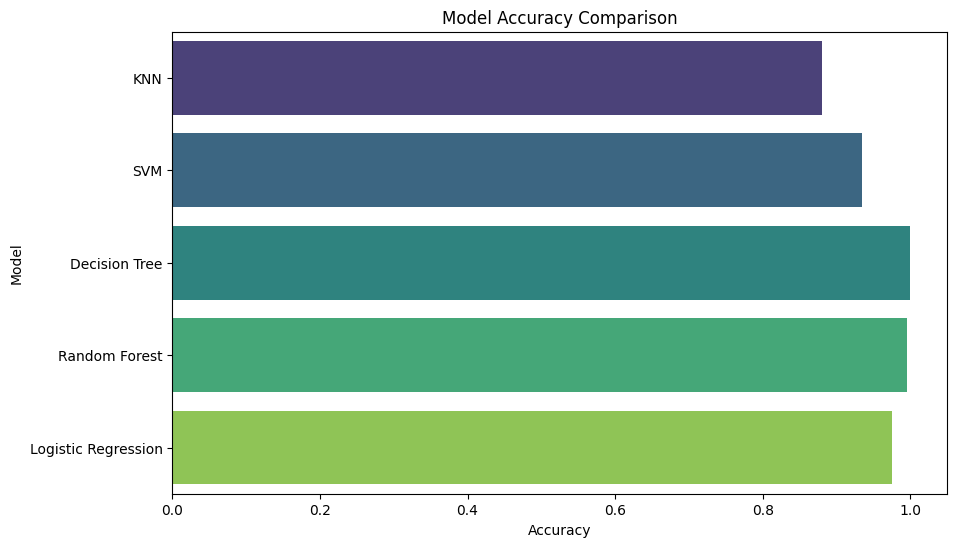

In [39]:
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


# Trying K-Fold Cross-Validation Comparison

In [40]:
# Define models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Initialize an empty dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform 5-fold cross-validation and calculate accuracy scores(four training parts and one testing part)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Store the mean accuracy and standard deviation for each model
    cv_results[model_name] = {'mean_accuracy': scores.mean(), 'std_dev': scores.std()}

    # Print the cross-validation results for the current model
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

# Convert the results into a DataFrame for better organization
cv_results_df = pd.DataFrame(cv_results).T  # Transpose for better readability

# Display the final cross-validation results
print("\nCross-Validation Results:\n", cv_results_df)

Logistic Regression: Mean Accuracy = 0.9820, Std Dev = 0.0075
Decision Tree: Mean Accuracy = 0.9980, Std Dev = 0.0024
Random Forest: Mean Accuracy = 0.9980, Std Dev = 0.0024
KNN: Mean Accuracy = 0.8290, Std Dev = 0.0377
SVM: Mean Accuracy = 0.9530, Std Dev = 0.0108

Cross-Validation Results:
                      mean_accuracy   std_dev
Logistic Regression          0.982  0.007483
Decision Tree                0.998  0.002449
Random Forest                0.998  0.002449
KNN                          0.829  0.037736
SVM                          0.953  0.010770


<ipython-input-41-cc7a88f37864>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_results_df.index, y="mean_accuracy", data=cv_results_df, palette="viridis")


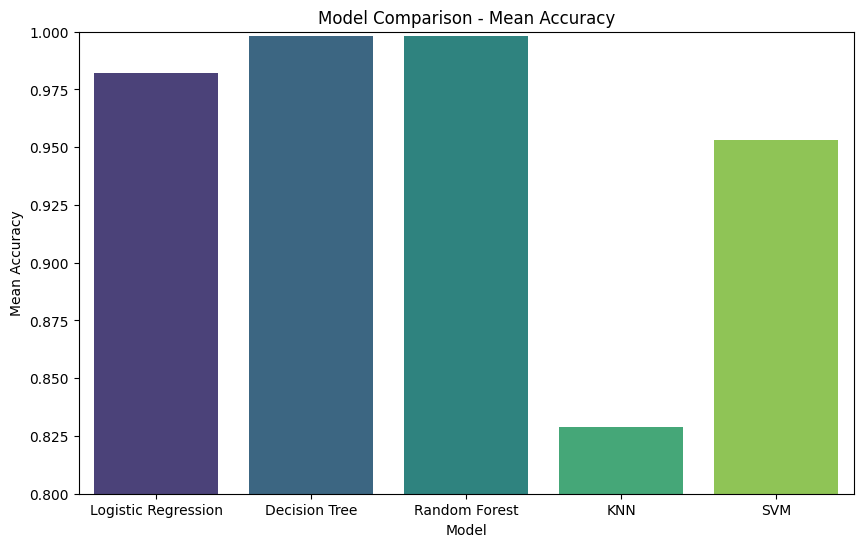

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cv_results_df.index, y="mean_accuracy", data=cv_results_df, palette="viridis")
plt.title("Model Comparison - Mean Accuracy")
plt.ylabel("Mean Accuracy")
plt.xlabel("Model")
plt.ylim(0.8, 1.0)
plt.show()

#Stacking Ensemble

In [42]:
# 1. Define Base Models:
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True))  # Ensure probability estimates for SVM
]

# 2. Define Stacking Classifier with a Meta-learner:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()  # You can change the meta-learner if needed
)

# 3. Train the Stacking Model:
stacking_model.fit(X_train, y_train)

# 4. Make Predictions:
y_pred_stacking = stacking_model.predict(X_test)

# 5. Evaluate the Model:
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("\nStacking Accuracy:", stacking_accuracy)

# (Optional) Print classification report and confusion matrix
print("\nStacking Classification Report:\n", classification_report(y_test, y_pred_stacking))
print("\nStacking Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))


Stacking Accuracy: 1.0

Stacking Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        96

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Stacking Confusion Matrix:
 [[104   0]
 [  0  96]]


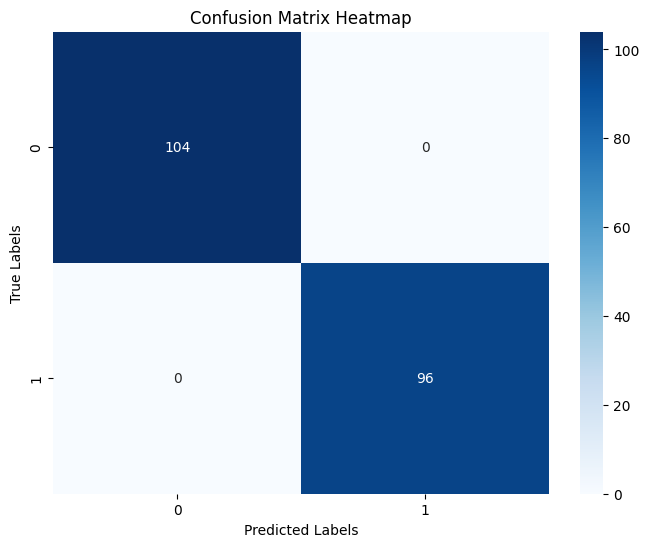

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()